In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from pprint import pprint

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [115]:
dataset = pd.read_csv("cars_sampled.csv")
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [116]:
dataset.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [117]:
dataset.shape

(50001, 19)

In [118]:
dataset.nunique()

dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64

In [119]:
dataset.isna().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [120]:
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [121]:
dataset.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
postalCode              int64
lastSeen               object
dtype: object

In [122]:
dataset["dateCrawled"] = pd.to_datetime(dataset["dateCrawled"])
dataset["dateCreated"] = pd.to_datetime(dataset["dateCreated"])
dataset["lastSeen"] = pd.to_datetime(dataset["lastSeen"])
dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00


In [123]:
dataset.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
notRepairedDamage              object
dateCreated            datetime64[ns]
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [124]:
price = dataset["price"]
price

0         4450
1        13299
2         3200
3         4500
4        18750
         ...  
49996        0
49997    19999
49998        0
49999      100
50000     1100
Name: price, Length: 50001, dtype: int64

In [125]:
price.describe()

count      50001.000
mean        6559.865
std        85818.470
min            0.000
25%         1150.000
50%         2950.000
75%         7190.000
max     12345678.000
Name: price, dtype: float64

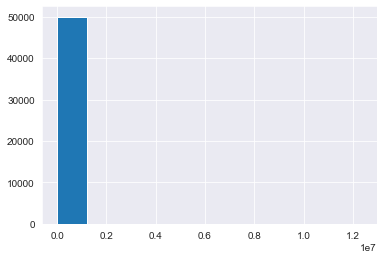

In [126]:
price.hist();

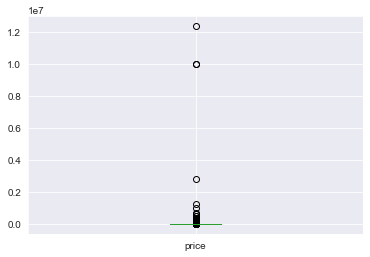

In [127]:
dataset.boxplot(column=["price"]);

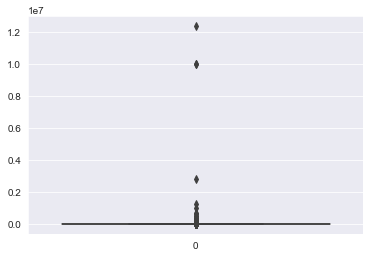

In [128]:
sns.boxplot(data=price);

In [129]:
price.describe()

count      50001.000
mean        6559.865
std        85818.470
min            0.000
25%         1150.000
50%         2950.000
75%         7190.000
max     12345678.000
Name: price, dtype: float64

In [130]:
price.value_counts().sort_index()

0           1451
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

In [131]:
dataset.sort_values(by=["price"], ascending=False)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
48559,2016-03-26 00:56:00,tausche_o_verkaufe,private,offer,12345678,test,station wagon,2001,manual,101,focus,150000,0,petrol,ford,no,2016-03-26,17291,2016-01-04 21:18:00
355,2016-03-04 14:36:00,Hilfe_Hilfe_Hilfe,private,offer,10010011,test,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,NaN,2016-03-04,44532,2016-05-04 13:18:00
17673,2016-03-19 19:45:00,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,private,offer,9999999,control,coupe,1967,manual,215,911,50000,10,petrol,porsche,no,2016-03-19,70435,2016-01-04 10:45:00
6509,2016-02-04 00:06:00,Ferrari_LaFerrari_Deutsche_Auslieferung._A_Cel...,private,offer,2795000,control,coupe,2016,NaN,963,NaN,5000,3,NaN,sonstige_autos,no,2016-01-04,60435,2016-03-04 14:32:00
35390,2016-10-03 20:43:00,Porsche_991_R,private,offer,1250000,test,coupe,2016,manual,500,911,5000,3,petrol,porsche,no,2016-10-03,10719,2016-03-15 15:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41302,2016-03-31 16:53:00,Winterauto_top_zuverlaessig_bis_zuletzt_gelaufen,private,offer,0,control,NaN,2016,manual,116,6_reihe,150000,7,petrol,mazda,NaN,2016-03-31,38275,2016-03-31 16:53:00
6178,2016-03-28 21:48:00,Opel_Kadett_Rieger_Gto_Breitbau_Rar_Selten_Gsi...,private,offer,0,control,NaN,1990,NaN,0,kadett,150000,0,NaN,opel,NaN,2016-03-28,66877,2016-07-04 04:45:00
45805,2016-03-04 09:00:00,Volkswagen_Golf_3_GTI_16v_ABF_Tausch_moeglich_...,private,offer,0,test,coupe,1993,manual,150,golf,100000,10,petrol,volkswagen,no,2016-03-04,45665,2016-07-04 10:45:00
12828,2016-03-25 10:38:00,Verkaufe_sehr_gepflegten_VW_Lupo_mit_Frontschaden,private,offer,0,test,small car,2002,manual,60,lupo,150000,4,petrol,volkswagen,yes,2016-03-25,66484,2016-06-04 09:45:00


In [132]:
dataset.drop(dataset.sort_values(by=["price"], ascending=False)[:2].index, inplace=True)
dataset.sort_values(by=["price"], ascending=False)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
17673,2016-03-19 19:45:00,Porsche_911_911R_1_of_20_ORIGINAL_R_nur_798KG!...,private,offer,9999999,control,coupe,1967,manual,215,911,50000,10,petrol,porsche,no,2016-03-19,70435,2016-01-04 10:45:00
6509,2016-02-04 00:06:00,Ferrari_LaFerrari_Deutsche_Auslieferung._A_Cel...,private,offer,2795000,control,coupe,2016,NaN,963,NaN,5000,3,NaN,sonstige_autos,no,2016-01-04,60435,2016-03-04 14:32:00
35390,2016-10-03 20:43:00,Porsche_991_R,private,offer,1250000,test,coupe,2016,manual,500,911,5000,3,petrol,porsche,no,2016-10-03,10719,2016-03-15 15:19:00
11028,2016-03-21 20:45:00,BMW_///_Bodensee,private,offer,999999,control,NaN,9999,NaN,0,NaN,10000,0,NaN,bmw,NaN,2016-03-21,88677,2016-03-27 06:15:00
22872,2016-12-03 18:46:00,Porsche_911R,private,offer,700000,test,coupe,2016,NaN,0,911,5000,3,NaN,porsche,no,2016-12-03,76275,2016-12-03 18:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,2016-03-28 21:48:00,Opel_Kadett_Rieger_Gto_Breitbau_Rar_Selten_Gsi...,private,offer,0,control,NaN,1990,NaN,0,kadett,150000,0,NaN,opel,NaN,2016-03-28,66877,2016-07-04 04:45:00
41302,2016-03-31 16:53:00,Winterauto_top_zuverlaessig_bis_zuletzt_gelaufen,private,offer,0,control,NaN,2016,manual,116,6_reihe,150000,7,petrol,mazda,NaN,2016-03-31,38275,2016-03-31 16:53:00
12828,2016-03-25 10:38:00,Verkaufe_sehr_gepflegten_VW_Lupo_mit_Frontschaden,private,offer,0,test,small car,2002,manual,60,lupo,150000,4,petrol,volkswagen,yes,2016-03-25,66484,2016-06-04 09:45:00
45805,2016-03-04 09:00:00,Volkswagen_Golf_3_GTI_16v_ABF_Tausch_moeglich_...,private,offer,0,test,coupe,1993,manual,150,golf,100000,10,petrol,volkswagen,no,2016-03-04,45665,2016-07-04 10:45:00


In [133]:
from sklearn import preprocessing

price = np.array(dataset["price"])
normal_price = preprocessing.normalize(price.reshape(1, -1))
normal_price

array([[4.10045016e-04, 1.22543566e-03, 2.94863832e-04, ...,
        0.00000000e+00, 9.21449474e-06, 1.01359442e-04]])

In [134]:
# dataset["price"] = normal_price.reshape(-1, 1)
dataset

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,2016-03-30 13:51:00,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,2016-03-30,20257,2016-07-04 04:44:00
1,2016-07-03 09:54:00,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,2016-07-03,88045,2016-03-26 13:17:00
2,2016-01-04 00:57:00,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,2016-03-31,27449,2016-01-04 08:40:00
3,2016-03-19 17:50:00,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,2016-03-19,34537,2016-07-04 04:44:00
4,2016-03-16 14:51:00,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,2016-03-16,55270,2016-01-04 23:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,2016-03-04 15:48:00,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-03-04,29690,2016-05-04 15:16:00
49997,2016-03-27 14:55:00,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,2016-03-27,50181,2016-07-04 11:45:00
49998,2016-03-14 18:51:00,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,2016-03-14,86956,2016-03-25 06:17:00
49999,2016-03-15 18:06:00,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,2016-03-15,65232,2016-06-04 17:15:00


In [135]:
dataset["price"].describe()

count     49999.000
mean       6113.005
std       48148.161
min           0.000
25%        1150.000
50%        2950.000
75%        7190.000
max     9999999.000
Name: price, dtype: float64

In [136]:
dataset.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
price,1.000,0.032,0.039,-0.087,0.015,0.018
yearOfRegistration,0.032,1.000,-0.004,-0.064,-0.023,-0.002
powerPS,0.039,-0.004,1.000,-0.016,0.034,0.017
kilometer,-0.087,-0.064,-0.016,1.000,0.002,-0.024
monthOfRegistration,0.015,-0.023,0.034,0.002,1.000,0.019
postalCode,0.018,-0.002,0.017,-0.024,0.019,1.000


In [137]:
dataset.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

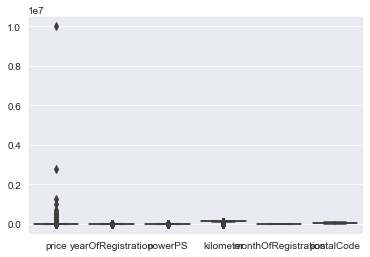

In [148]:
sns.boxplot(data=dataset);